In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Preprocessing

In [445]:
train_dataset = pd.read_csv('./train.csv')
test_dataset = pd.read_csv('./test.csv')

In [446]:
print(train_dataset.shape)
train_dataset.head()
# we're trying to predict the number of each product sold given these features
# date should pose an interesting feature to consider, the rest should be simply one hot encoded
# 26298 training samples

(26298, 6)


row_id        date  country       store         product  num_sold
0       0  2015-01-01  Finland  KaggleMart      Kaggle Mug       329
1       1  2015-01-01  Finland  KaggleMart      Kaggle Hat       520
2       2  2015-01-01  Finland  KaggleMart  Kaggle Sticker       146
3       3  2015-01-01  Finland  KaggleRama      Kaggle Mug       572
4       4  2015-01-01  Finland  KaggleRama      Kaggle Hat       911

In [447]:
print(test_dataset.shape)
test_dataset.head()

(6570, 5)


row_id        date  country       store         product
0   26298  2019-01-01  Finland  KaggleMart      Kaggle Mug
1   26299  2019-01-01  Finland  KaggleMart      Kaggle Hat
2   26300  2019-01-01  Finland  KaggleMart  Kaggle Sticker
3   26301  2019-01-01  Finland  KaggleRama      Kaggle Mug
4   26302  2019-01-01  Finland  KaggleRama      Kaggle Hat

In [448]:
# discrete sample spaces
print(train_dataset['country'].unique()) # only three countries
print(train_dataset['store'].unique()) # two stores
print(train_dataset['product'].unique()) # three products

['Finland' 'Norway' 'Sweden']
['KaggleMart' 'KaggleRama']
['Kaggle Mug' 'Kaggle Hat' 'Kaggle Sticker']


In [449]:
print(test_dataset['country'].unique()) # only three countries
print(test_dataset['store'].unique()) # two stores
print(test_dataset['product'].unique()) # three products

['Finland' 'Norway' 'Sweden']
['KaggleMart' 'KaggleRama']
['Kaggle Mug' 'Kaggle Hat' 'Kaggle Sticker']


In [450]:
print(train_dataset['date'].unique().shape) # 1461 different dates
print(train_dataset['num_sold'].unique().shape) # various different amounts sold
# date needs to be broken down somehow

(1461,)
(1377,)


In [451]:
train_dataset['date'].unique()
# seems to range from 2015 to 2018, does year matter ?
# lets break it up into separate columns of year, month, day

array(['2015-01-01', '2015-01-02', '2015-01-03', ..., '2018-12-29',
       '2018-12-30', '2018-12-31'], dtype=object)

In [452]:
train_dataset['year'] = train_dataset['date'].str[:4]
train_dataset['month'] = train_dataset['date'].str[5:7]
train_dataset['day'] = train_dataset['date'].str[8:10]

In [453]:
print(train_dataset['year'].unique()) # range of 2015 to 2018
print(train_dataset['month'].unique()) # range of 01 to 12 as expected
print(train_dataset['day'].unique()) # range of 01 to 31 as expected

['2015' '2016' '2017' '2018']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']


In [454]:
train_dataset.head()

row_id        date  country       store         product  num_sold  year  \
0       0  2015-01-01  Finland  KaggleMart      Kaggle Mug       329  2015   
1       1  2015-01-01  Finland  KaggleMart      Kaggle Hat       520  2015   
2       2  2015-01-01  Finland  KaggleMart  Kaggle Sticker       146  2015   
3       3  2015-01-01  Finland  KaggleRama      Kaggle Mug       572  2015   
4       4  2015-01-01  Finland  KaggleRama      Kaggle Hat       911  2015   

  month day  
0    01  01  
1    01  01  
2    01  01  
3    01  01  
4    01  01

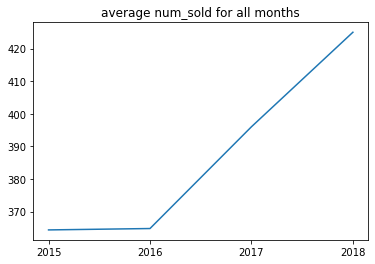

In [455]:
# lets try to visualize this a little better
mean_2015 = np.mean(train_dataset[train_dataset['year']=='2015']['num_sold'])
mean_2016 = np.mean(train_dataset[train_dataset['year']=='2016']['num_sold'])
mean_2017 = np.mean(train_dataset[train_dataset['year']=='2017']['num_sold'])
mean_2018 = np.mean(train_dataset[train_dataset['year']=='2018']['num_sold'])
# print(mean_2015)
# print(mean_2016)
# print(mean_2017)
# print(mean_2018)
plt.title('average num_sold for all months')
plt.plot(['2015', '2016', '2017', '2018'], [mean_2015, mean_2016, mean_2017, mean_2018])
plt.show()

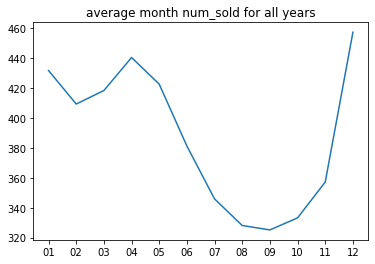

In [456]:
month_means_y = []
month_means_x = train_dataset['month'].unique()
for month in month_means_x:
    month_means_y.append(np.mean(train_dataset[train_dataset['month']==month]['num_sold']))
plt.title('average month num_sold for all years')
plt.plot(month_means_x, month_means_y)
plt.show()

average num_sold for all month/years


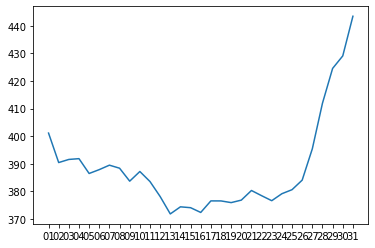

In [457]:
day_means_y = []
day_means_x = train_dataset['day'].unique()
for day in day_means_x:
    day_means_y.append(np.mean(train_dataset[train_dataset['day']==day]['num_sold']))
print('average num_sold for all month/years')
plt.plot(day_means_x, day_means_y)
plt.show()

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))


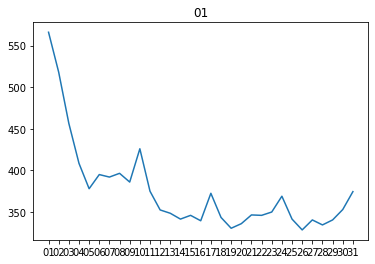

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


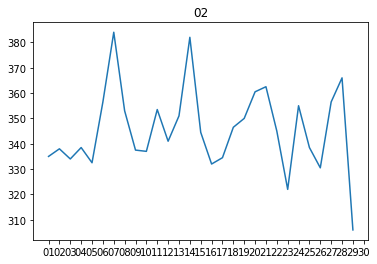

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))


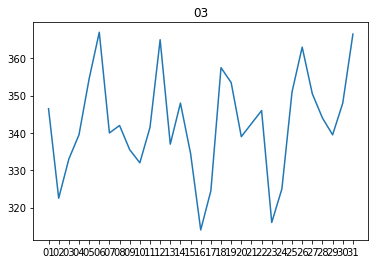

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


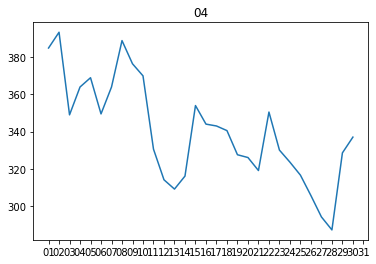

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))


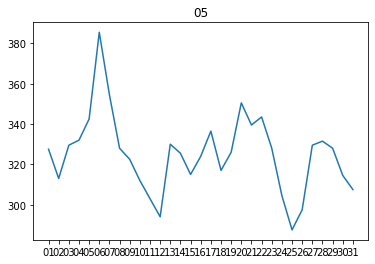

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


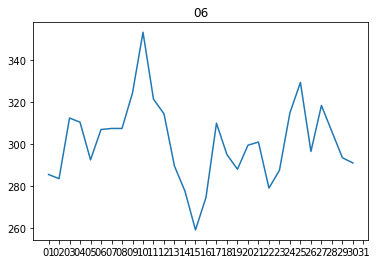

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))


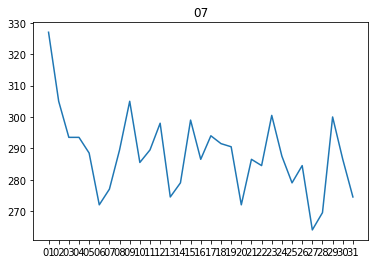

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))


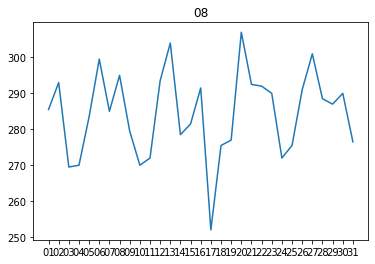

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


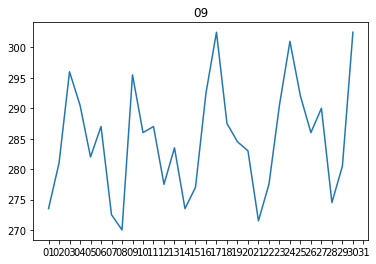

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))


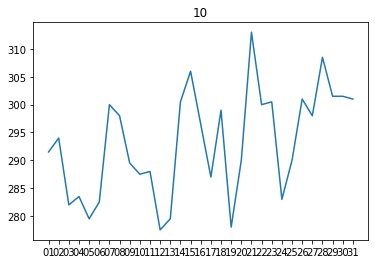

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aaron/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


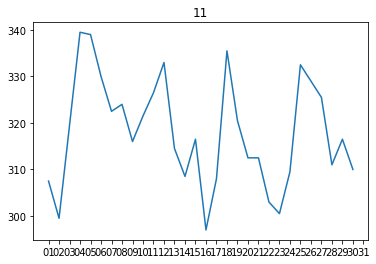

<ipython-input-458-2309568a5ee9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))


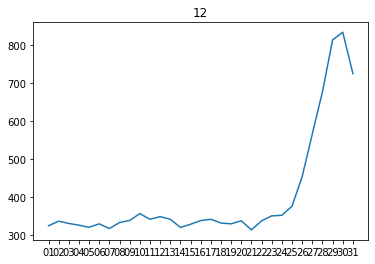

In [458]:
# different monthxday trends
# we notice some weekly looking trends, maybe weekday could be a good feature
day_means_x = train_dataset['day'].unique()
for month in month_means_x:
    day_means_y = []
    for day in day_means_x:
        day_means_y.append(np.median(train_dataset[train_dataset['month']==month][train_dataset['day']==day]['num_sold']))
    plt.title(month)
    plt.plot(day_means_x, day_means_y)
    plt.show()

In [459]:
train_dataset.head()

row_id        date  country       store         product  num_sold  year  \
0       0  2015-01-01  Finland  KaggleMart      Kaggle Mug       329  2015   
1       1  2015-01-01  Finland  KaggleMart      Kaggle Hat       520  2015   
2       2  2015-01-01  Finland  KaggleMart  Kaggle Sticker       146  2015   
3       3  2015-01-01  Finland  KaggleRama      Kaggle Mug       572  2015   
4       4  2015-01-01  Finland  KaggleRama      Kaggle Hat       911  2015   

  month day  
0    01  01  
1    01  01  
2    01  01  
3    01  01  
4    01  01

In [460]:
# seems like we want to one hot encode almost everything
# we can try excluding days and adding them later if they improve performance
# ['Finland' 'Norway' 'Sweden'] - [0, 0, 0]
# ['KaggleMart' 'KaggleRama'] - [0, 0]
# ['Kaggle Mug' 'Kaggle Hat' 'Kaggle Sticker'] - [0, 0, 0]
# ['2015', '2016', '2017', '2018'] - [0, 0, 0, 0]
# ['01', '02', ..., '11', '12'] - [0, 0, ..., 0, 0]
# total of 24 features, ignoring days for now
# maybe we want day to be day of the week
# can separate days by beginning, middle, end of month - [0, 0, 0]
train_dataset['day_of_week'] = pd.to_datetime(train_dataset['date'], format='%Y-%M-%d').dt.weekday.astype(str)

In [461]:
train_dataset.head()

row_id        date  country       store         product  num_sold  year  \
0       0  2015-01-01  Finland  KaggleMart      Kaggle Mug       329  2015   
1       1  2015-01-01  Finland  KaggleMart      Kaggle Hat       520  2015   
2       2  2015-01-01  Finland  KaggleMart  Kaggle Sticker       146  2015   
3       3  2015-01-01  Finland  KaggleRama      Kaggle Mug       572  2015   
4       4  2015-01-01  Finland  KaggleRama      Kaggle Hat       911  2015   

  month day day_of_week  
0    01  01           3  
1    01  01           3  
2    01  01           3  
3    01  01           3  
4    01  01           3

In [462]:
x = train_dataset
x['beg_month'] = np.where(x['day'].astype(int) <= 9, 1, 0)
x['mid_month'] = np.where((x['day'].astype(int) > 9) & (x['day'].astype(int)<20), 1, 0)
x['end_month'] = np.where(x['day'].astype(int) >= 20, 1, 0)
x['years_since_2016'] = np.where(x['year'].astype(int)-2016 > 0, x['year'].astype(int)-2016, 0)
y = train_dataset['num_sold']
x = x.drop(['date', 'day', 'num_sold', 'row_id', 'year'], axis=1)

In [463]:
# one hot encoding interpretation
x = pd.get_dummies(x)

In [464]:
print(x.columns)
x.head() 

Index(['beg_month', 'mid_month', 'end_month', 'years_since_2016',
       'country_Finland', 'country_Norway', 'country_Sweden',
       'store_KaggleMart', 'store_KaggleRama', 'product_Kaggle Hat',
       'product_Kaggle Mug', 'product_Kaggle Sticker', 'month_01', 'month_02',
       'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08',
       'month_09', 'month_10', 'month_11', 'month_12', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'],
      dtype='object')


beg_month  mid_month  end_month  years_since_2016  country_Finland  \
0          1          0          0                 0                1   
1          1          0          0                 0                1   
2          1          0          0                 0                1   
3          1          0          0                 0                1   
4          1          0          0                 0                1   

   country_Norway  country_Sweden  store_KaggleMart  store_KaggleRama  \
0               0               0                 1                 0   
1               0               0                 1                 0   
2               0               0                 1                 0   
3               0               0                 0                 1   
4               0               0                 0                 1   

   product_Kaggle Hat  ...  month_10  month_11  month_12  day_of_week_0  \
0                   0  ...         0         0         0              0   
1                   1  ...         0         0         0              0   
2                   0  ...         0         0         0              0   
3                   0  ...         0         0         0              0   
4                   1  ...         0         0         0              0   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0              0              0              1              0              0   
1              0              0              1              0              0   
2              0              0              1              0              0   
3              0              0              1              0              0   
4              0              0              1              0              0   

   day_of_week_6  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 31 columns]

# Model

In [465]:
print(x.shape)
x.head()

(26298, 31)


beg_month  mid_month  end_month  years_since_2016  country_Finland  \
0          1          0          0                 0                1   
1          1          0          0                 0                1   
2          1          0          0                 0                1   
3          1          0          0                 0                1   
4          1          0          0                 0                1   

   country_Norway  country_Sweden  store_KaggleMart  store_KaggleRama  \
0               0               0                 1                 0   
1               0               0                 1                 0   
2               0               0                 1                 0   
3               0               0                 0                 1   
4               0               0                 0                 1   

   product_Kaggle Hat  ...  month_10  month_11  month_12  day_of_week_0  \
0                   0  ...         0         0         0              0   
1                   1  ...         0         0         0              0   
2                   0  ...         0         0         0              0   
3                   0  ...         0         0         0              0   
4                   1  ...         0         0         0              0   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0              0              0              1              0              0   
1              0              0              1              0              0   
2              0              0              1              0              0   
3              0              0              1              0              0   
4              0              0              1              0              0   

   day_of_week_6  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 31 columns]

In [466]:
print(y.shape)
y.head()

(26298,)


0    329
1    520
2    146
3    572
4    911
Name: num_sold, dtype: int64

In [467]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [468]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [469]:
regr = MLPRegressor(hidden_layer_sizes=(128,64,64), max_iter=20000).fit(X_train, y_train)

In [470]:
score = regr.score(X_test, y_test)

In [471]:
print(score)

0.9349551591182996


In [478]:
regr_full_dataset = MLPRegressor(hidden_layer_sizes=(128,64,64), max_iter=20000).fit(x, y)

In [479]:
# preprocess dataset for test
test_dataset['year'] = test_dataset['date'].str[:4]
test_dataset['month'] = test_dataset['date'].str[5:7]
test_dataset['day'] = test_dataset['date'].str[8:10]

test_x = test_dataset
test_x['beg_month'] = np.where(test_x['day'].astype(int) <= 9, 1, 0)
test_x['mid_month'] = np.where((test_x['day'].astype(int) > 9) & (test_x['day'].astype(int)<20), 1, 0)
test_x['end_month'] = np.where(test_x['day'].astype(int) >= 20, 1, 0)
test_x['years_since_2016'] = np.where(test_x['year'].astype(int)-2016 > 0, test_x['year'].astype(int)-2016, 0)
test_x['day_of_week'] = pd.to_datetime(test_x['date'], format='%Y-%M-%d').dt.weekday.astype(str)
test_y = train_dataset['num_sold']

test_x = test_x.drop(['date', 'day', 'row_id', 'year'], axis=1)
test_x = pd.get_dummies(test_x)

print(test_x.columns)
test_x.head()

Index(['beg_month', 'mid_month', 'end_month', 'years_since_2016',
       'country_Finland', 'country_Norway', 'country_Sweden',
       'store_KaggleMart', 'store_KaggleRama', 'product_Kaggle Hat',
       'product_Kaggle Mug', 'product_Kaggle Sticker', 'month_01', 'month_02',
       'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08',
       'month_09', 'month_10', 'month_11', 'month_12', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'],
      dtype='object')


beg_month  mid_month  end_month  years_since_2016  country_Finland  \
0          1          0          0                 3                1   
1          1          0          0                 3                1   
2          1          0          0                 3                1   
3          1          0          0                 3                1   
4          1          0          0                 3                1   

   country_Norway  country_Sweden  store_KaggleMart  store_KaggleRama  \
0               0               0                 1                 0   
1               0               0                 1                 0   
2               0               0                 1                 0   
3               0               0                 0                 1   
4               0               0                 0                 1   

   product_Kaggle Hat  ...  month_10  month_11  month_12  day_of_week_0  \
0                   0  ...         0         0         0              0   
1                   1  ...         0         0         0              0   
2                   0  ...         0         0         0              0   
3                   0  ...         0         0         0              0   
4                   1  ...         0         0         0              0   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

   day_of_week_6  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 31 columns]

In [480]:
prediction = regr_full_dataset.predict(test_x)

In [481]:
output = pd.DataFrame(data=prediction, columns=['num_sold'])
output.index.name = 'row_id'
output.index = output.index+26298

In [482]:
output.head()

num_sold
row_id            
26298   369.371105
26299   584.263208
26300   138.624860
26301   613.764705
26302   952.214823

In [483]:
output.to_csv('./output.csv', index=True)

In [485]:
prediction = regr_full_dataset.predict(x)
output = pd.DataFrame(data=prediction, columns=['num_sold'])
output.index.name = 'row_id'
output.to_csv('./output_train.csv', index=True)